# Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Important Distributions

Analytic cumulative distribution functions (CDFs) and probability density functions (PDFs) are frequently used as models for practical random processes. They allow to describe the statistical properties of a random process by a few parameters. These parameters are fitted to an actual random process and are used in algorithms for statistical signal processing. For the following, weakly stationary random processes are assumed.

### Uniform Distribution

#### Definition

The PDF of the [uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) is given as

$$ p_x(\theta) = \begin{cases} \frac{1}{b - a} & \text{for } a \leq \theta \leq b \\ 0 & \text{otherwise} \end{cases} $$

where $a$ and $b$ denote the lower and upper bound for the amplitude of the random signal $x[k]$. The uniform distribution assumes that all amplitudes between these bounds occur with the same probability. The CDF can be derived from the PDF by integration over $\theta$

$$ P_x(\theta) = \begin{cases} 0 & \text{for } \theta < a \\ 
                                \frac{\theta - a}{b - a} & \text{for } a \leq \theta < b \\
                                1 & \text{for } \theta \geq b \end{cases} $$

The linear mean computes to

$$\mu_x = \frac{a+b}{2}$$

and the variance is

$$\sigma_x^2 = \frac{(b-a)^2}{12}$$

In order to plot the PDF and CDF of the various distributions, a function is defined 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_pdf_cdf(x, distr):
    plt.figure(figsize = (10, 5))

    plt.subplot(121)
    plt.plot(x, distr.pdf(x))
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$p_x(\theta)$')
    plt.title('PDF')
    plt.grid()

    plt.subplot(122)
    plt.plot(x, distr.cdf(x))
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P_x(\theta)$')
    plt.title('CDF')
    plt.grid()

The PDF/CDF for a uniformly distributed random signal with $a=0$ and $b=1$ is plotted

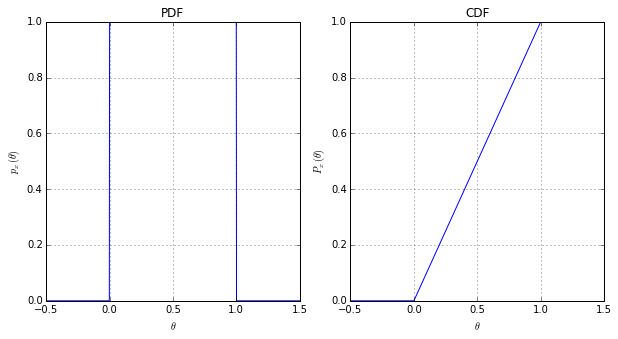

In [2]:
plot_pdf_cdf(np.linspace(-.5, 1.5, num=1000), stats.uniform)

#### Example

Most software frameworks for numerical mathematics provide functions to generate random samples with a defined PDF. So does [`Numpy`](http://docs.scipy.org/doc/numpy/reference/routines.random.html) or [`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions). We again first define a function that computes and plots the PDF and CDF of a given random signal.

In [3]:
def compute_plot_pdf_cdf(x, nbins=100):

    plt.figure(figsize = (10, 6))
    plt.hist(x, nbins, normed=True)
    plt.title('Estimated PDF')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\hat{p}_x(\theta)$')
    
    plt.figure(figsize = (10, 6))
    plt.hist(x, nbins, cumulative=True, normed=True)
    plt.title('Estimated CDF')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\hat{P}_x(\theta)$')
    
    print('Linear mean: %f' %np.mean(x))
    print('Variance: %f' %np.var(x))

For the standard uniform distribution ($a=0$, $b=1$) we get the following results

Linear mean: 0.501043
Variance: 0.083031


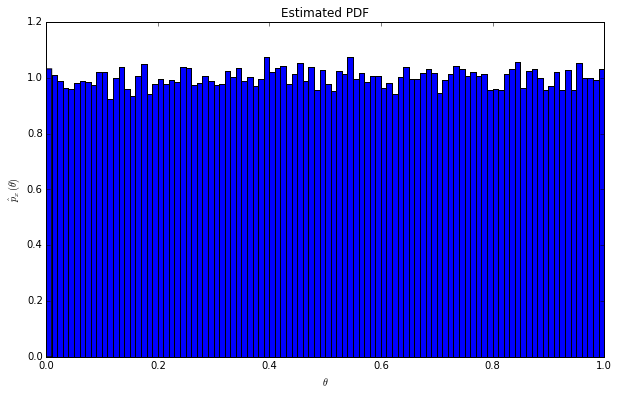

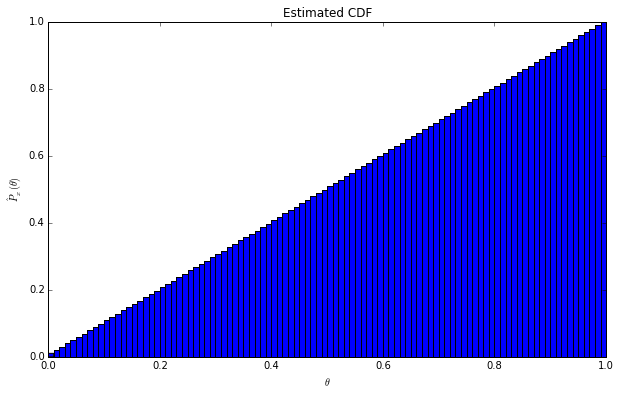

In [4]:
compute_plot_pdf_cdf(stats.uniform.rvs(size=100000), nbins=100)

**Exercise**

* Why is the estimate of the CDF smoother that the estimate of the PDF?
* How can the upper $b$ and lower bound $a$ be changed in above code?
* What changes if you change the length of the random signal or the number `nbins` of histogram bins?

### Normal Distribution

#### Definition

The PDF of the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)/Gaussian distribution  is given as

$$ p_x(\theta) = \frac{1}{\sqrt{2 \pi} \sigma_x} \mathrm{e}^{- \frac{(\theta - \mu_x)^2}{2 \sigma_x^2}} $$

where $\mu_x$ and $\sigma_x^2$ denote the linear mean and variance, respectively. Normal distributions are often used to represent random variables whose distributions are not known. The central limit theorem states that averages of random variables independently drawn from independent distributions become normally distributed when the number of random variables is sufficiently large. As a result, random signals that are expected to be the sum of many independent processes often have distributions that are nearly normal. The CDF can be derived by integration over $\theta$

\begin{align}
P_x(\theta) &= \frac{1}{\sqrt{2 \pi} \sigma_x} \int\limits_{—\infty}^{\theta} \mathrm{e}^{- \frac{(\zeta - \mu_x)^2}{2 \sigma_x^2}} \mathrm{d}\zeta \\
&= \frac{1}{2} \left( 1 + \text{erf}\left( \frac{\theta-\mu_x}{\sqrt{2} \sigma_x} \right)\right)
\end{align}

where $\text{erf}(\cdot)$ denotes the [error function](https://en.wikipedia.org/wiki/Error_function).

For the standard zero-mean normal distribution ($\mu_x=0$, $\sigma_x^2=1$) the PDF/CDF are illustrated in the following

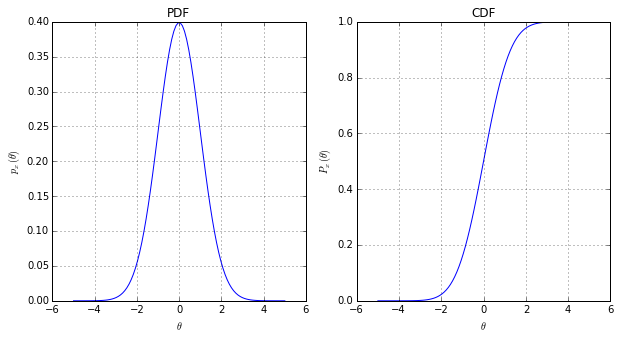

In [5]:
plot_pdf_cdf(np.linspace(-5, 5, num=100), stats.norm)

#### Example

For the standard zero-mean uniform distribution we get the following numerical results when drawing a large number of random samples

Linear mean: 0.004293
Variance: 0.998803


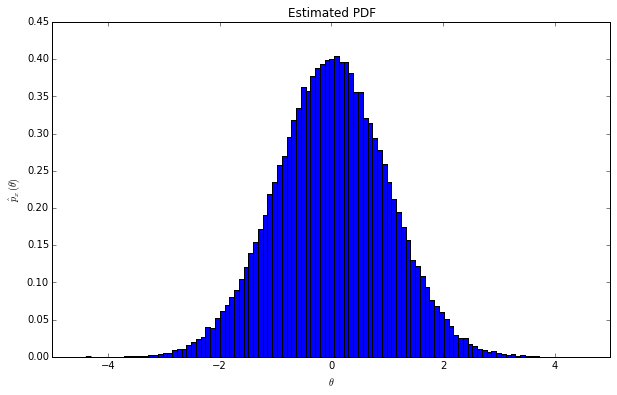

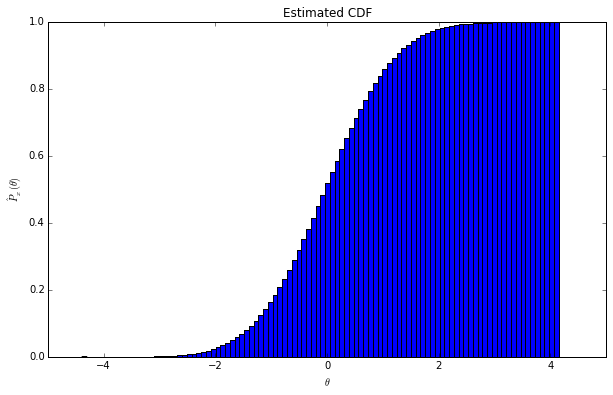

In [6]:
compute_plot_pdf_cdf(stats.norm.rvs(size=100000), nbins=100)

**Exercise**

* How can the linear mean $\mu_x$ and the variance $\sigma_x^2$ be changed?
* Assume you want to model zero-mean measurement noise with a given power $P$. How do you have to chose the parameters of the normal distribution?

### Laplace Distribution

#### Definition

The PDF of the [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution) is given as

$$ p_x(\theta) = \frac{1}{\sqrt{2} \sigma_x} \mathrm{e}^{- \sqrt{2} \frac{|\theta - \mu_x|}{\sigma_x}} $$

where $\mu_x$ and $\sigma_x^2$ denote the linear mean and variance, respectively. Laplace distributions are often used to model the PDF of a speech or music signal. The CDF can be derived by integration over $\theta$

$$ P_x(\theta) = \begin{cases}
\frac{1}{2} \mathrm{e}^{\sqrt{2} \frac{\theta - \mu_x}{\sigma_x}} & \text{for } \theta \leq \mu_x \\
1 - \frac{1}{2} \mathrm{e}^{- \sqrt{2} \frac{\theta - \mu_x}{\sigma_x}} & \text{for } \theta > \mu_x
\end{cases} $$

For the zero-mean, unit-variance Laplace distribution the PDF/CDF is illustrated. Note the scale parameter in [`scipy.stats.laplace`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace) is related to the variance by $\lambda = \frac{\sigma_x}{\sqrt{2}}$

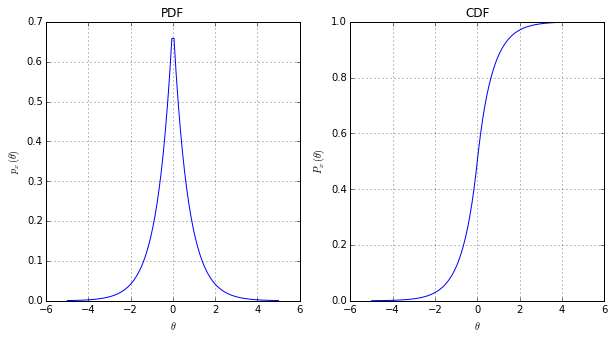

In [7]:
plot_pdf_cdf(np.linspace(-5, 5, num=100), stats.laplace(scale=1/np.sqrt(2)))

#### Example

For the standard zero-mean Laplace distribution we get the following numerical results when drawing a large numer of random samples

Linear mean: -0.015657
Variance: 1.004444


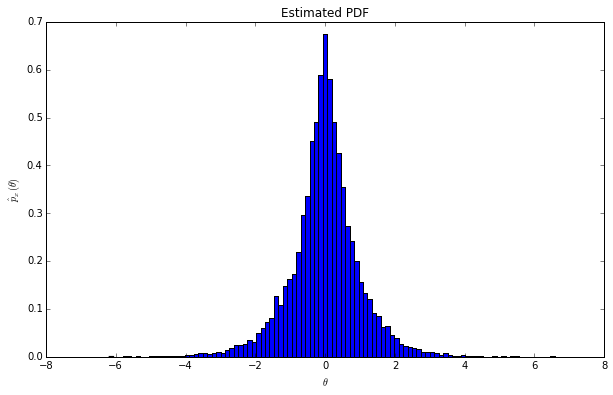

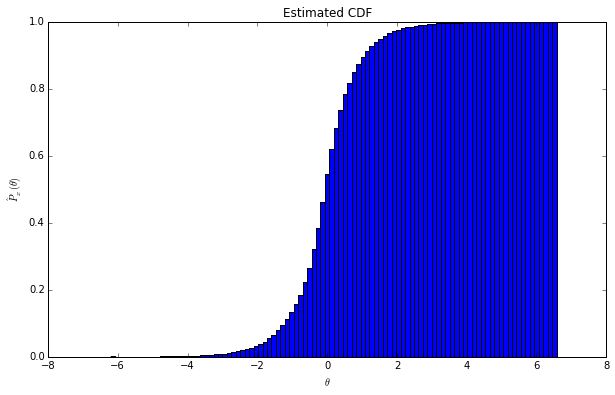

In [8]:
compute_plot_pdf_cdf(stats.laplace(scale=1/np.sqrt(2)).rvs(size=10000), nbins=100)

### Amplitude Distribution of a Speech Signal

Lets take a look at the PDF/CDF of a speech signal in order to see if we can model it by one of the PDFs introduced above.

Linear mean: -0.000067
Variance: 0.018548


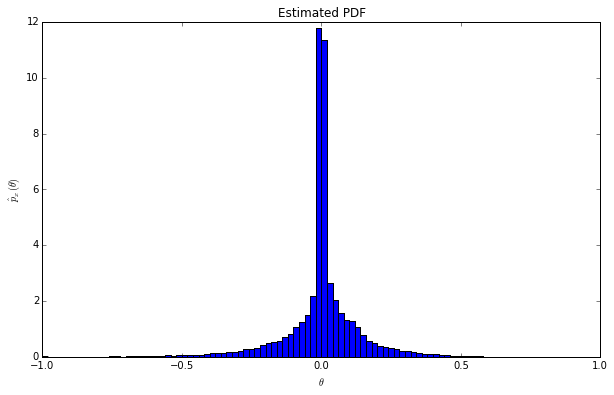

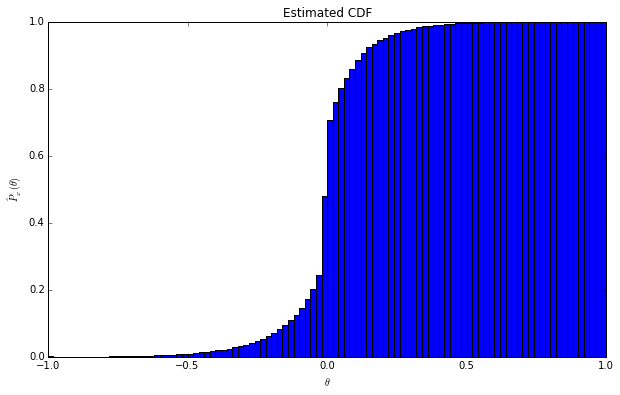

In [9]:
from scipy.io import wavfile

fs, x = wavfile.read('../data/speech_8k.wav')
x = np.asarray(x, dtype=float)/2**15
compute_plot_pdf_cdf(x, nbins=100)

**Exercise**

* Which analytic PDF/CDF can be used to model a speech signal?
* How would you chose the parameters of the distribution to fit the data?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>